# End-to-end Machine Learning project using Scikit-learn
Based on https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb

## 1. Look at the big picture.
See slides.

## 2. Get the data

In [50]:
# Import packages
import pandas as pd
import numpy as np

Let's start by loading the data. You might have to change the path to the file depending on where it is saved in your computer.

In [51]:
# Load data
data = pd.read_csv('HousingData.csv')

Let's explore the dataset. Starting by looking at the first five observations (data points). This allows us to see the variables in the dataset and it's a good preview of the type of data (e.g. numerical, categorical) for each variable. "The 25%, 50%, and 75% rows show the corresponding percentiles : a percentile indicates the value below which a given percentage of observations in a group of observations fall. For example, 25% of the districts have a housing_median_age lower than 18, while 50% are lower than 29 and 75% are lower than 37.
Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow ".

In [52]:
# Explore data variables
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Next we are going to check for missing values and for actual data type using the info method.

In [53]:
# Check for missing data and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


As can be seen from the output of info, most variables do not contain missing data but total_bedrooms do. This will be addressed later in the project. Now we are going to summarise the data in terms of its summary statistics. What are the mean, standard variation etc. for each variable. This gives us a sense of how the data is distributed and the existance of outliers and differences in scale between variables.

In [54]:
# Describe is a good method to use to give you an idea of the distribution of each variable 
# and why normalizing the data is a good idea.
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another way of getting a quick look at the entire dataset before starting a more formal exploratory analysis of the data is to use the following plotting functions. What can you tell from the histograms for each variable? "A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis).
Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow ". Check here for more information on what a histogram is: https://www.mathsisfun.com/data/histograms.html 

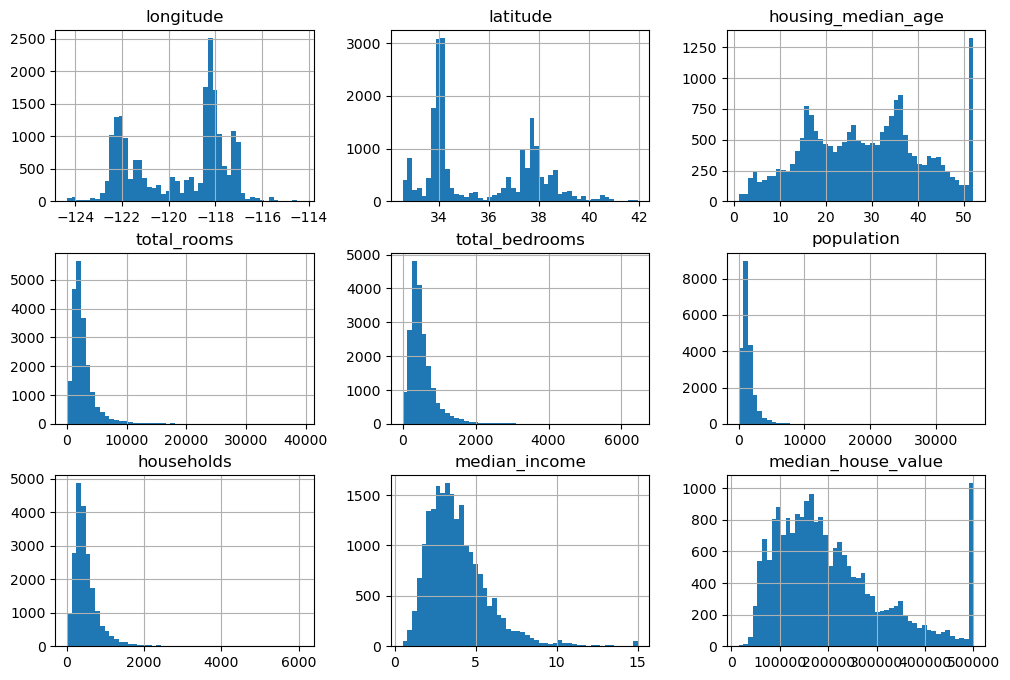

In [55]:
# Let's atart by exploring the data using matplotlib histograms
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(12, 8))
plt.show()


The variable 'Ocean Proximity' is categorical. To understand how many categories there are in the dataset and how many observations per category, we can use the following code:

In [56]:
# There are 5 categories in ocean proximity and they highly imbalanced. 
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Can you think of other plots or other ways to look at the data before a more formal exploration?

What have we learned from the data so far?

Do you think it's possible to predict median house price from the variables in the dataset?

Is there something we need to pay attention to or be careful with going forwards in our analysis?

### Create test set
Before we continue it's important to create our test dataset, where we are going to evaluate our machine learning model on. The test set cannot be used to influence our decisions on the modelling process and therefore needs to be set aside and only used in the evaluation phase of the project. The easiest way to create a test set is to use scikit learn functionality, for example:

In [57]:
# Import split function from scikit learn
from sklearn.model_selection import train_test_split

# The simplest slipt (the random state fixes how the data is randomly selected, so that it's always the same split everytime we run this cell)
dtrain, dtest = train_test_split(data, test_size=0.2, random_state=0)

Before we continue, we need to ask some questions of the test set:

How well does it represent the entire dataset?

Are we selection from one category more/less than we should?

How good is it at representing the population so that we can trust the evaluation results?

For this particular dataset it might be better to stratify the train/test split by median income. This is because the median income variable is a good predictor for median house precise and knowledge of the data has shown that a simple random split of the data creates a test set that doesn't represent the distribution of median incomes as well as a stratified dataset. So the following lines of code use a function of scikit learn for splitting the data into train and test sets that respect how the median income variable is distributed.

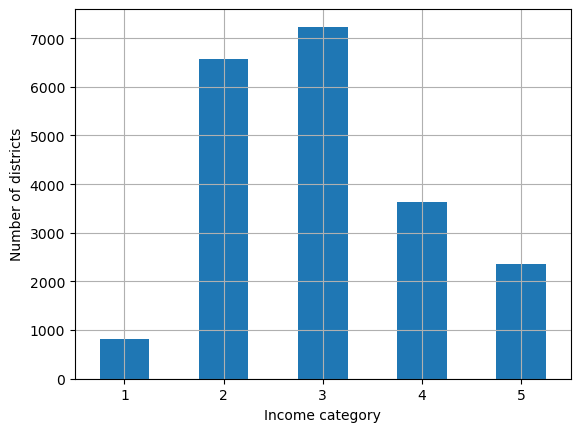

In [58]:
# First the median income variable is categorised into 5 different groups of income
data["income_cat"] = pd.cut(data["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

data["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [59]:
# Now the data can be split respecting these categories
from sklearn.model_selection import StratifiedShuffleSplit

# Produce indices for training and test observations
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in split.split(data, data["income_cat"]):
    strat_dtrain = data.iloc[train_index]
    strat_dtest = data.iloc[test_index]

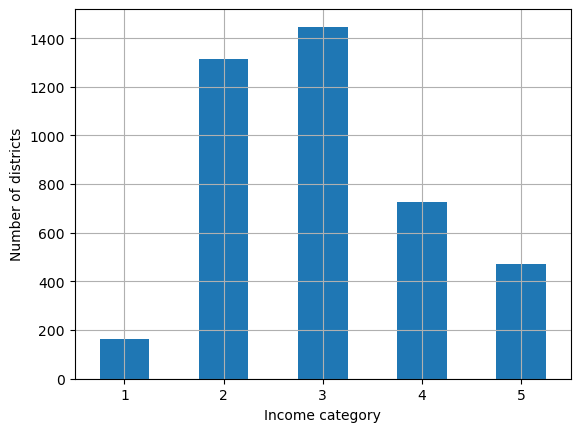

In [60]:
# Check that stratification worked correctly
strat_dtest["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [61]:
# Now delete the extra column for income category that is not needed for the Machine Learning analysis
for set_ in (strat_dtrain, strat_dtest):
    set_.drop("income_cat", axis=1, inplace=True)

C:\Users\md82\AppData\Local\Temp\ipykernel_25216\3151724678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)
C:\Users\md82\AppData\Local\Temp\ipykernel_25216\3151724678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)


## Discover and visualize the data to gain insights

"So far you have only taken a quick glance at the data to get a general understanding of the kind of data you are manipulating. Now the goal is to go into a little more depth."
Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow.

First create a copy of the training data for exploration so that nothing happens to the original data while this step takes place.

In [63]:
housing = strat_dtrain.copy()

Since we have variables for latitute and longitude we can visualise some of the data geographicaly. For example, we can plot the population size for each district (using the latitude, longitude variables) and colour code them by median house price in the same district:

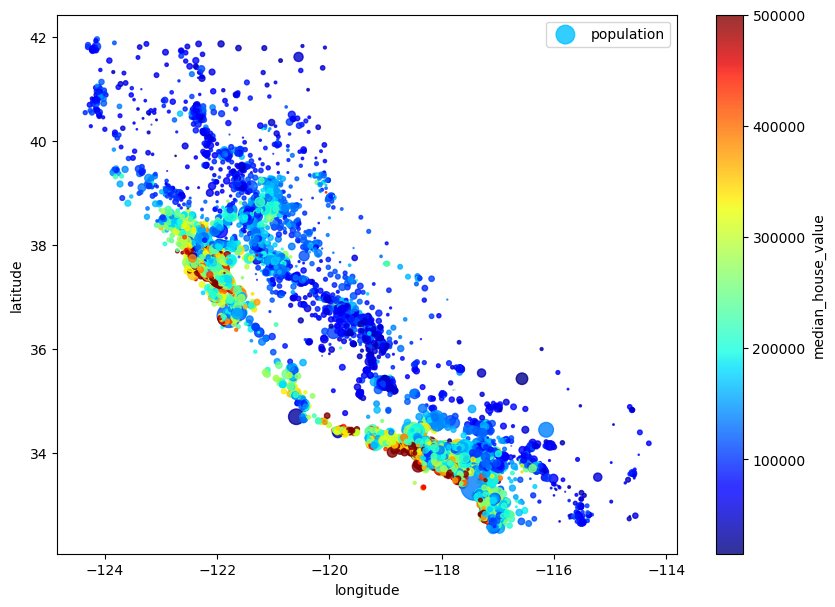

In [64]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.8,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

What do you conclude from the above plot?

Is there a particular variable from the dataset that is predictive of high median house prices in general?

Another very useful plot to get a look at the data is the pairplot from seaborn. In this case the are too many variables and the plot becomes slow, so it's good to select only the numerical variables of interest, and colour them using a categorical variable, in our case 'Ocean Proximity'. This plot allows one to get a better sense of the distribution of each variable (is it bell shaped, does it have multiple peaks?) and how variables correlate (have a linear relationship) with each other.

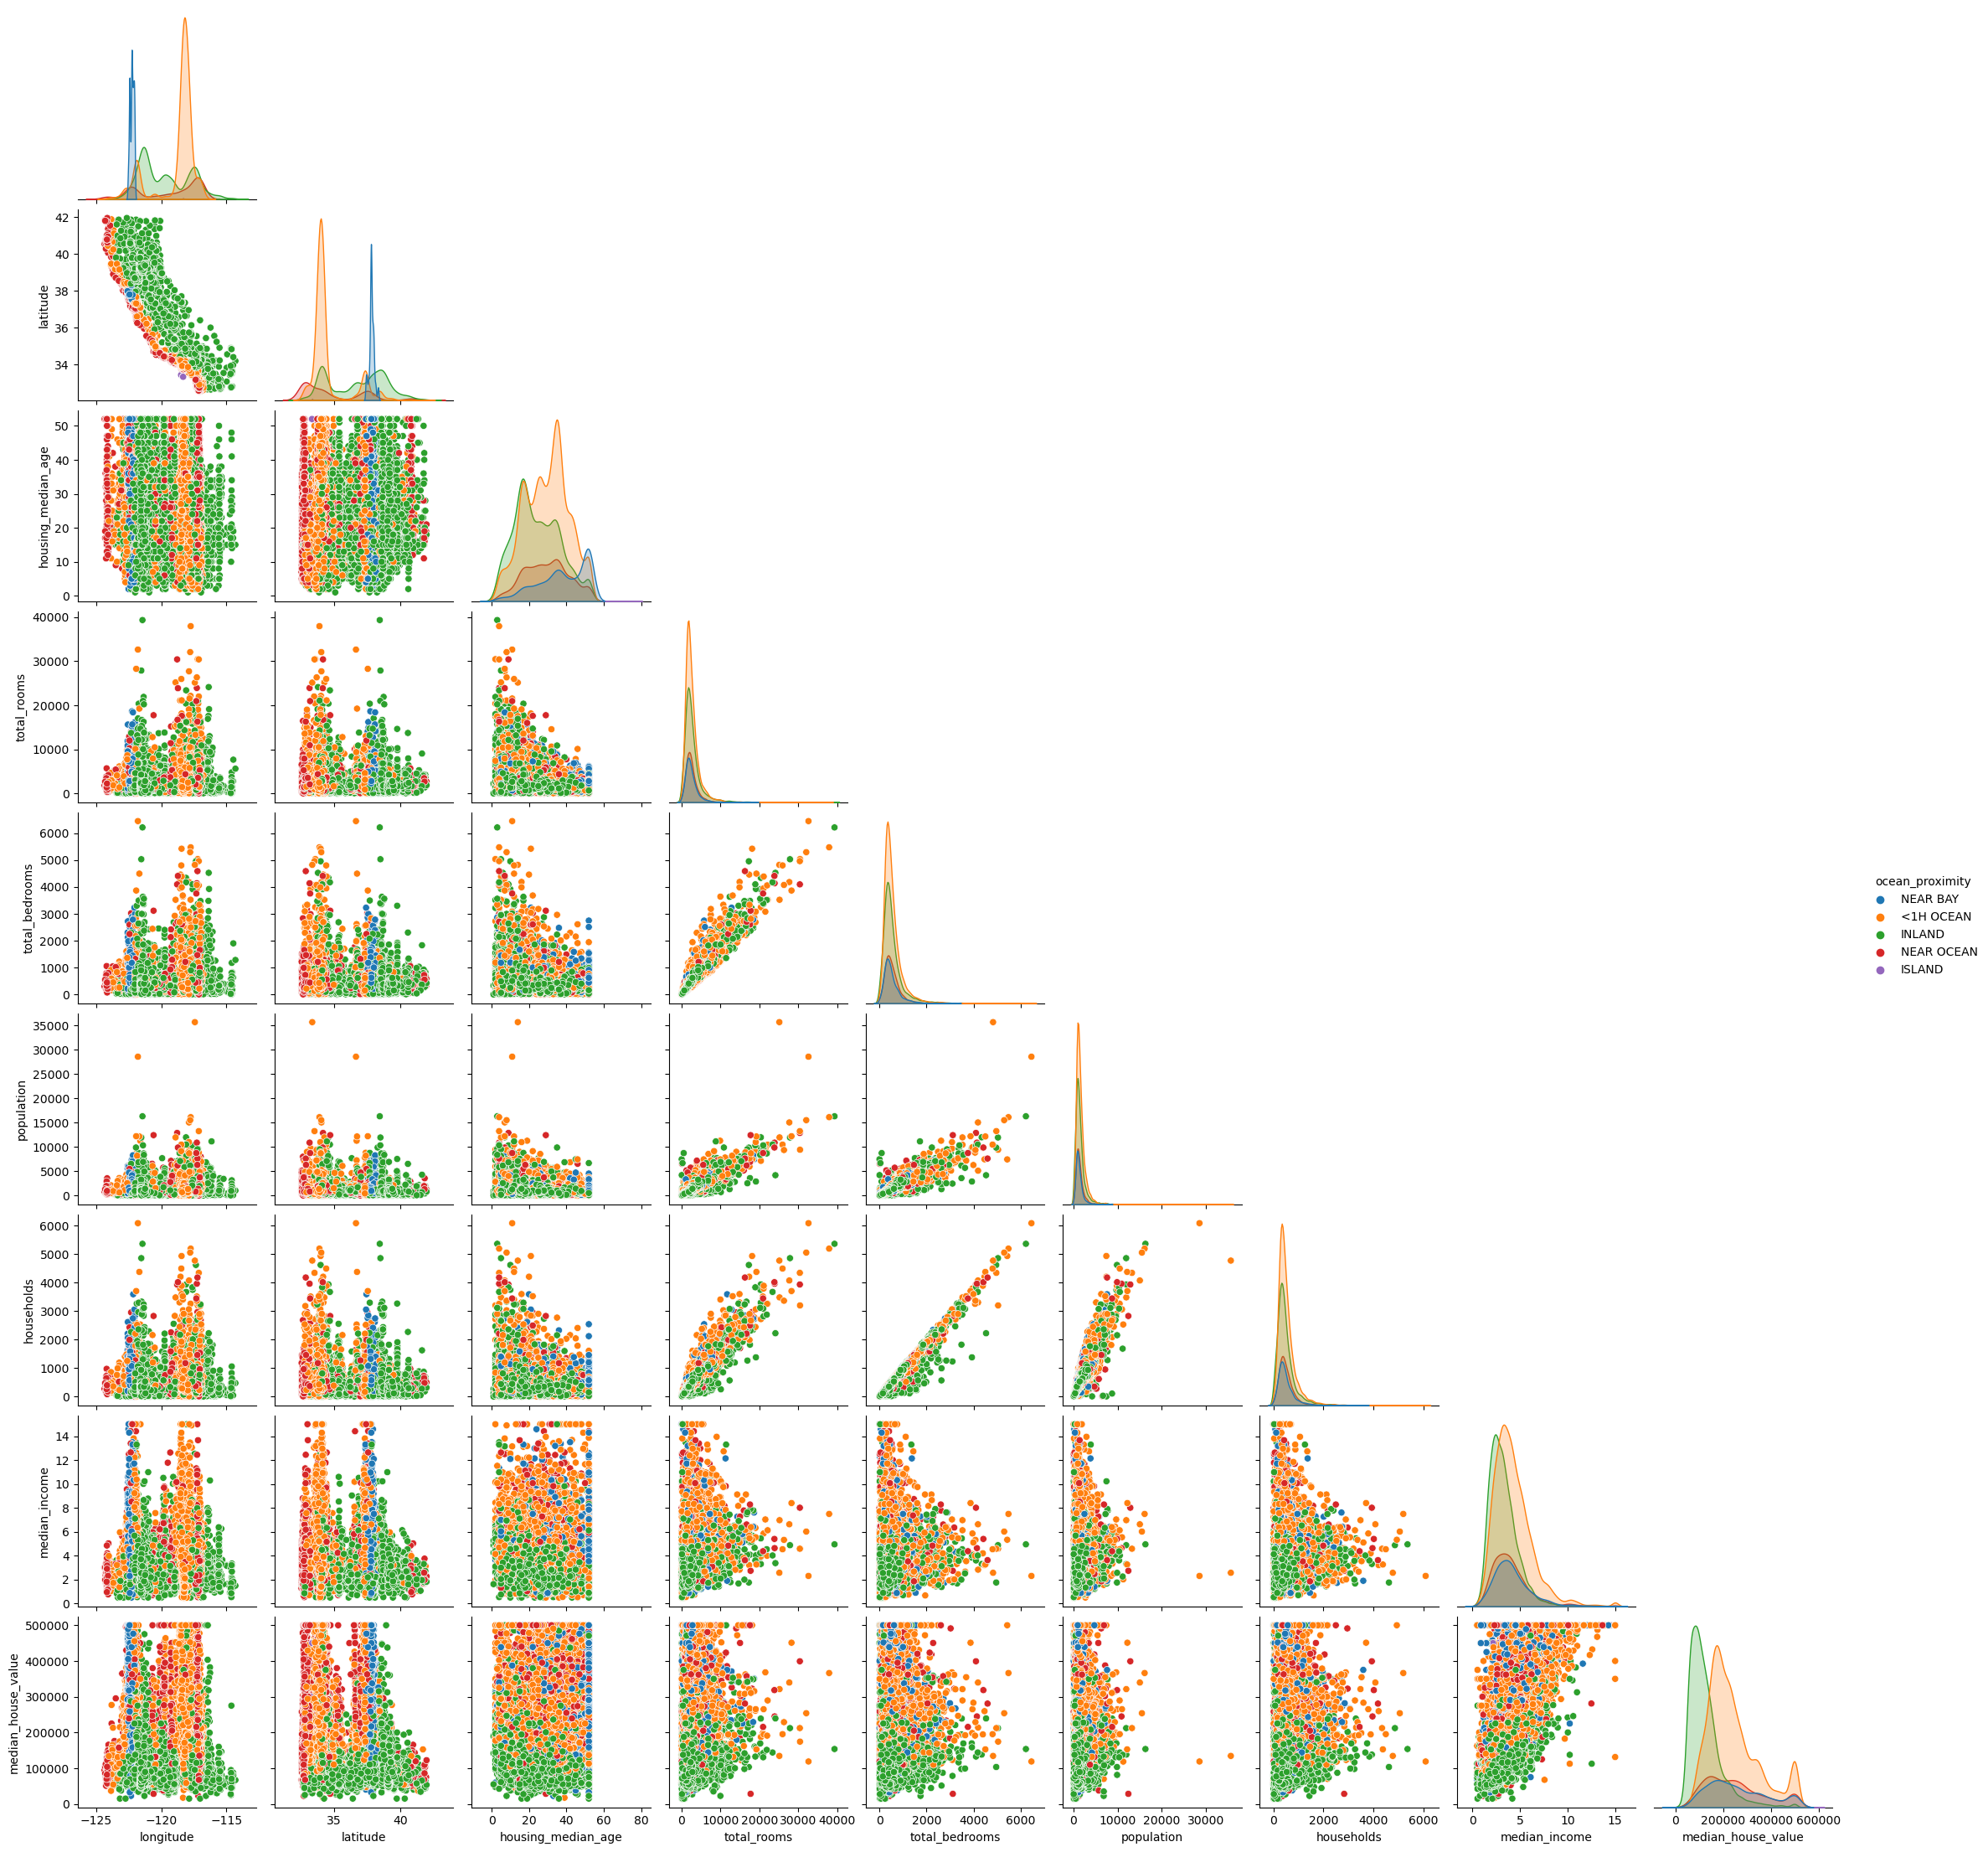

In [65]:
# Load seaborn and use pairplot to visualize the data
import seaborn as sns
sns.pairplot(data, corner=True, hue="ocean_proximity")

To get a better estimate of the correlation (linear relationship) between pairs of variable one can 

In [16]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690047
total_rooms           0.139320
housing_median_age    0.107589
households            0.070065
total_bedrooms        0.052883
population           -0.020588
longitude            -0.043439
latitude             -0.146360
Name: median_house_value, dtype: float64

Confirms plot.
https://en.wikipedia.org/wiki/Correlation

The highest correlation seems to be between median house values and median income, and we can plot these two variables in a separate scatter plot to confirm:


<Axes: xlabel='median_income', ylabel='median_house_value'>

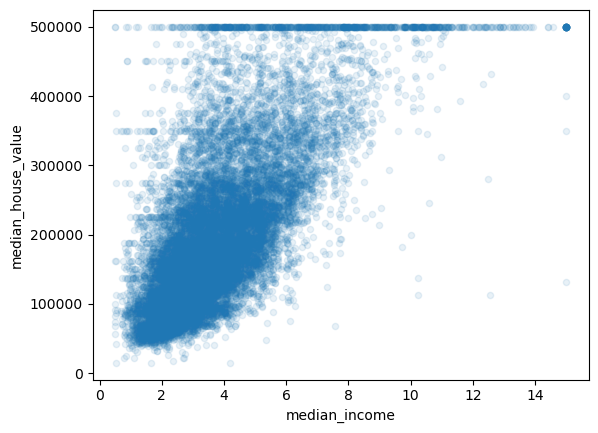

In [18]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

Do you see anything strange in the above figure?

Is there anything that you think would lead to problems with the Machine Learning algorithm?

Before we finish our exploration we could try to think of variables that we don't have in the dataset but that could be more predictive of median house prices. These new variables could be combinations of existing variables, such as the number of rooms per household, the number of bedrooms per room, the population size per household.

In [20]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

If we now compute again the correlations, we can see that some of our combined new variables better correlate with the target variabe, the median house prices, than the original variables.

In [21]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\md82\AppData\Local\Temp\ipykernel_25216\826279322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.690047
rooms_per_household         0.177089
total_rooms                 0.139320
housing_median_age          0.107589
households                  0.070065
total_bedrooms              0.052883
population                 -0.020588
population_per_household   -0.024845
longitude                  -0.043439
latitude                   -0.146360
bedrooms_per_room          -0.259403
Name: median_house_value, dtype: float64

What other things could you do to explore this dataset before continuing to do Machine Learning?

## Prepare the Data for Machine Learning Algorithms

Let's use a clean dataset again (not the one used for exploring the data). And let's separate our predictors or features (X data) from the targets, or what we are trying to predict (y).

In [66]:
Xtrain = strat_dtrain.drop("median_house_value", axis=1)
ytrain = strat_dtrain["median_house_value"].copy()

### Data Cleaning

In general, Machine Learning algorithms do not deal well with missing data. As we know we have some missing data we need to address this issue first.

To deal with missing data, there are in general three options:
1. Get rid of the corresponding observations with missing data.
2. Get rid of the whole attribute/variable.
3. Set the missing values to some value (the mean, the median, etc.)

Pandas has very useful functionality to deal with missing data, for example:

In [23]:
# Do not run this cell
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

"If you choose option 3, you should compute the median value on the training set and
use it to fill the missing values in the training set. Don’t forget to save the median
value that you have computed. You will need it later to replace missing values in the
test set when you want to evaluate your system, and also once the system goes live to
replace missing values in new data." Geron, Scikit Learn book

Scikit learn also provides functionality to deal with missing data. For example we can impute the missing data using the median as follows:


In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [25]:
# The median cannot be calculated on non-numerical data so let's create a copy of the dataset without the ocean proximity variable.
Xtrain_num = Xtrain.drop("ocean_proximity", axis=1)

We can compute the median using the fit method of the imputer, and check the result for each variable as follows:

In [26]:
imputer.fit(Xtrain_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2127.    ,  437.    , 1167.    ,
        410.    ,    3.5351])

In [27]:
Xtrain_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2127.    ,  437.    , 1167.    ,
        410.    ,    3.5351])

The final step to deal with missing data is to transform the training data using the imputer and its estimated statistics (in this case the median). Using scikit learn this is achieved by using the transform method and passing the training numerical data with the missing values to be imputedas argument.

In [29]:
# Apply the transformation (imputing the median for all missing values) on the training data
X = imputer.transform(Xtrain_num)

# Convert to Pandas dataframe if needed.
X = pd.DataFrame(X, columns=Xtrain_num.columns, index=Xtrain_num.index)

### Handling Text and Categorical Variables

After cleaning the numerical data, we can look at the non-numerical features of the dataset. The Machine Learning algorithms in general do not work with text or non-numerical data without these data first being transformed to being numeric. In this dataset we have only one non-numeric feature, ocean proximity. This variable of the dataset contains text data, but when we look at the number of unique values we can conclude that the text data refers to finite categories (categorical data):

In [67]:
Xtrain_cat = Xtrain[["ocean_proximity"]]
Xtrain_cat['ocean_proximity'].value_counts()

<1H OCEAN     7308
INLAND        5217
NEAR OCEAN    2119
NEAR BAY      1863
ISLAND           5
Name: ocean_proximity, dtype: int64

If the categories do not have a specific order, such as in ocean proximity, the best way to convert them to numeric is to use a one-hot-encoding. One hot encoding converts categorical data to numerical vectors (one-hot vectors). These vectors have a length equals to the number of categories. All entries are zero (cold), except for a specific category which has an entry of 1 (hot). For example if INLAND is the second category a one-hot vector for INLAND could be 0,1,0,0,0.

Scikit-learn has functionality to convert categorical data into one-hot vectors:

In [68]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(Xtrain_cat)
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

### Feature scaling

One of the most important transformations needed before the data is passed to the Machine Learning algorithm is feature scaling. In general, algorithms don't work well when the input numerical features have very different scales. This is the case in the housing dataset:

In [69]:
Xtrain.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16345.000000,16512.000000,16512.000000,16512.000000
mean,-119.583639,35.645913,28.619489,2629.207909,537.292199,1420.610041,498.773801,3.874562
std,2.008598,2.138820,12.590031,2149.618521,418.181574,1127.883172,379.029941,1.906793
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.810000,33.930000,18.000000,1452.000000,296.000000,785.000000,280.000000,2.570075
50%,-118.510000,34.260000,29.000000,2127.000000,437.000000,1167.000000,410.000000,3.535100
75%,-118.010000,37.720000,37.000000,3142.000000,646.000000,1722.000000,605.000000,4.742300
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100


In general, it is not necessary to scale the target variable (in our case the median house prices). The two most common ways to scale the input features are: min-max scaling and standardization.

"Min-max scaling (many people call this normalization) is the simplest: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting
the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called MinMaxScaler for this. It has a feature_range hyperparameter that lets you change the range if, for some reason, you don’t want 0–1. Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called StandardScaler for standardization." Geron, chapter 3 book.

It is important to fit the scalers only on the training data. The transformations are then applied to both the training and test data.

One easy way to apply all the transformations needed to prepare the data for the Machine Learning algorithm is to use a transformation pipeline. For example, we can create a pipeline for the numerical data (which involves imputing and scaling the data) and then another pipeline that applies the numerical pipeline and also deals with the categorical data.

In [72]:
# Copy the training data again to create the numerical dataset before imputation
Xtrain_num = Xtrain.drop("ocean_proximity", axis=1)

In [73]:
# Pipeline for the numerical features (imputation and scaling)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [76]:
# Pipeline for processing numerical and categorical data (hot-one encoding) seperately.
from sklearn.compose import ColumnTransformer

num_attribs = list(Xtrain_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

Xtrain_prepared = full_pipeline.fit_transform(Xtrain)

We are now ready to run our Machine Learning analysis on this dataset and try to predict median house prices.

## Select and Train a Model

Now that we have got the data, we have created a training and test set, and we have prepared it for Machine Learning (imputed missing values, scaled it, and transformed categorical variables into one-hot vectors) it is time to do some Machine Learning.

### Training and Evaluating on the Training Set

Let's start with the simplest regression algorithm, Linear Regresson. To train the model on the training data, simply import the model from scikit-learn, create an object and call the fit method using the training features and training labels (median house prices).

In [83]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(Xtrain_prepared, ytrain)

LinearRegression()

Let's check the Root Mean Squared Error (RMSE) for this model on the training data:

In [94]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(Xtrain_prepared)
lin_mse = mean_squared_error(ytrain, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68529.80914728741

"This is better than nothing, but clearly not a great score: most districts’ median_housing_values range between $120,000 and $265,000, so a typical prediction error of $68,529 is not very satisfying. This is an example of a model underfitting the training data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. The main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model."

Let's try a more powerful model:

In [88]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(Xtrain_prepared, ytrain)

predictions = tree_reg.predict(Xtrain_prepared)
tree_mse = mean_squared_error(ytrain, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Now we are in the opposite situation. The error is zero! It's very likely that hte model has badly overfit the data. Let's try a third model, Rendom Forest Regression.

In [89]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(Xtrain_prepared, ytrain)

predictions = forest_reg.predict(Xtrain_prepared)
forest_mse = mean_squared_error(ytrain, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18074.064153201998

It's better than Linear Regression and it doesn't seem to overfit as much as the Decision Trees. 

To compare the performance of different algorithms, we need to create a validation set. We cannot use the test set to compare algorithms or make any other decisions. So if we are going to evaluate different models, or different choices of parameters or any other aspect of the pipeline we need to create a separate set for evaluation. We can either simply split the training data again into training and test sets, or use cross-validation, which creates multiple splits of the data each, where in which split we have a train and validation set. We can then average the error on this validation set across splits. Cross-validation not only gives the mean error but also the standard deviation.

Let's compare the algorithms we trained so far using cross-validation (10 splits), for more information on cross-validation and scikit learn, see: https://scikit-learn.org/stable/modules/cross_validation.html 

In [96]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, Xtrain_prepared, ytrain, scoring="neg_mean_squared_error", cv=10)
lin_scores = np.sqrt(-scores)
scores = cross_val_score(tree_reg, Xtrain_prepared, ytrain, scoring="neg_mean_squared_error", cv=10)
tree_scores = np.sqrt(-scores)
scores = cross_val_score(forest_reg, Xtrain_prepared, ytrain, scoring="neg_mean_squared_error", cv=10)
forest_scores = np.sqrt(-scores)

In [97]:
def display_scores(scores):
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_scores)
display_scores(tree_scores)
display_scores(forest_scores)

Mean: 68755.2737314333
Standard deviation: 754.8599574674172
Mean: 68295.50647691925
Standard deviation: 1736.9638469870563
Mean: 48516.18884147286
Standard deviation: 1298.6652170053953


From 10-fold cross-validation it seems the best model is the Random Forest Regressor (lower average error). Let's now fine-tune (choose the best hyperparameters) this model to try to make it even better. 

## Fine-Tune Your Model

### Grid Search

One option to choose the best hyperparameters (parameters that are not learned during training) is to search for them manually. This is time consuming, not very reproducible and difficult to automate. It's best to use one of the standard approaches such as grid search. Scikit learn provides functionality for fine tuning.

You can find more information about Random Forest Regression and the hyperparameters here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

More information on grid search cross validation can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Other things in the preprocessing of thw data can be considered hyperparameters and be fine tuned as well, for example different preprocessing steps, such as missing data procedures, festure selection, scaling methods.


In [98]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(Xtrain_prepared, ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

"This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of n_estimators and max_features hyperparameter values specified in the first dict, then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to False instead of True (which is the default value for this hyperparameter). The grid search will explore 12 + 6 = 18 combinations of RandomForestRegressor hyperparameter values, and it will train each model 5 times (since we are using fivefold cross validation). In other words, all in all there will be 18 × 5 = 90 rounds of training! It may take quite a long time."

You can find the best combination of parameters as follows:

In [99]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [102]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [103]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

62830.03163136241 {'max_features': 2, 'n_estimators': 3}
54889.43533658301 {'max_features': 2, 'n_estimators': 10}
52206.93384446106 {'max_features': 2, 'n_estimators': 30}
58834.453758840296 {'max_features': 4, 'n_estimators': 3}
51982.93680709224 {'max_features': 4, 'n_estimators': 10}
49814.684802923744 {'max_features': 4, 'n_estimators': 30}
58749.12111079852 {'max_features': 6, 'n_estimators': 3}
51489.39137142709 {'max_features': 6, 'n_estimators': 10}
49339.76286835412 {'max_features': 6, 'n_estimators': 30}
59357.30743698748 {'max_features': 8, 'n_estimators': 3}
51626.684534546104 {'max_features': 8, 'n_estimators': 10}
49295.34737257947 {'max_features': 8, 'n_estimators': 30}
61195.632347714556 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53507.199815446664 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58539.80687415351 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51957.25411432783 {'bootstrap': False, 'max_features': 3, 'n_estimators

### Randomized search

"The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV instead. This class can be used in much the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration." One of the adjantahes is that one can set the number of iterations and therefore control the computational cost of the total search. It's also easier to explore a wider range of hyperparameters with this approach because it doesn't use every single combination of hyperparameters like grid search does. 

For more informaton on how to use randomized search see here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html 


### Analyze the Best Models and Their Errors

It's good practice to explore the importance of each feature for the predictions of the model. Often this exercise helps to gain insights on the problem. 

In [104]:
feature_importances = grid_search.best_estimator_.feature_importances_

array([0.11066215, 0.10325627, 0.04675721, 0.03300816, 0.02716322,
       0.0408656 , 0.02387597, 0.42768537, 0.01053649, 0.16753826,
       0.0004921 , 0.00142941, 0.0067298 ])

Let's visualize each feature importance value next to the name of the feature:

In [106]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.4276853651421944, 'median_income'),
 (0.16753825526051297, 'INLAND'),
 (0.11066214795432348, 'longitude'),
 (0.10325627304614705, 'latitude'),
 (0.04675720755808369, 'housing_median_age'),
 (0.040865599250502385, 'population'),
 (0.0330081610420704, 'total_rooms'),
 (0.027163215568849, 'total_bedrooms'),
 (0.023875970583607797, 'households'),
 (0.010536494241191614, '<1H OCEAN'),
 (0.006729802792229149, 'NEAR OCEAN'),
 (0.0014294062214801088, 'NEAR BAY'),
 (0.0004921013388080034, 'ISLAND')]

The most important features to predict the median price of a house seem to be the median income, if the district is INLAND and the longitude and latitude. This information could be used to remove unimportant features from the model or gain insights onto the problem.

### Evaluate Your System on the Test Set

After selecting and fine tuning a model, eventually we'll have a model that performs
sufficiently well on the validation data and we are happy to use the model on the test data. This is the final evaluation step and it's simpled. We get the test data, apply the same transformations using the parameters obtained from the training data (in our cases all we have to do is run the preprocessing pipeline on the test data - making use we use transform() and not fit_transform()) and make new predictions using our best regression model comparing them with the true test labels.

In [111]:
final_model = grid_search.best_estimator_

Xtest = strat_dtest.drop("median_house_value", axis=1)
ytest = strat_dtest["median_house_value"].copy()

Xtest_prepared = full_pipeline.transform(Xtest)

final_predictions = final_model.predict(Xtest_prepared)
final_mse = mean_squared_error(ytest, final_predictions)
final_rmse = np.sqrt(final_mse) # => evaluates to 47,730.2
final_rmse

50471.0551637383

It could be useful to calculate a 95% confidence interval for the test error, using the following code:

In [112]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - ytest) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([48122.88986412, 52714.72554997])

The Machine Learning alnalysis if finished. The next step would be to deploy and maintain the model but it is out of scope for this tutorial. If you'd like to learn more check the pdf for Chapter 2 of the Geron Handon On book (available in Canvas).

What else could you have done in this analysis? Some suggestions for additional things you could try doing on your own:

- Add the combined featues we created above to the model and retrain and evaluate the new model.
- Create a custom transformer that creates and adds the new combined features to the data and include it in the numerical pipeline.
- Save the model using joblib. Load a saved model.

Congratulations! You finished an end-to-end Machine Learning workflow.